## 实验目的


如果您以前从未使用过树状图，那么使用树状图是查看多维数据如何聚集在一起的好方法。 在这本笔记本中，我将简单探索通过层次分析，借助树状图将其可视化。


<br>


## 层次分析

层次分析是聚类分析的一种，scipy有这方面的封装包。

linkage函数从字面意思是链接，层次分析就是不断链接的过程，最终从n条数据，经过不断链接，最终聚合成一类，算法就此停止。

dendrogram是用来绘制树形图的函数。


<br>

## 实验数据

grain_variety是标签，其他列为多种属性的值（特征）。

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

seeds_df = pd.read_csv('seeds-less-rows.csv')
seeds_df.head()

area  perimeter  compactness  length  width  asymmetry_coefficient  \
0  14.88      14.57       0.8811   5.554  3.333                  1.018   
1  14.69      14.49       0.8799   5.563  3.259                  3.586   
2  14.03      14.16       0.8796   5.438  3.201                  1.717   
3  13.99      13.83       0.9183   5.119  3.383                  5.234   
4  14.11      14.26       0.8722   5.520  3.168                  2.688   

   groove_length grain_variety  
0          4.956    Kama wheat  
1          5.219    Kama wheat  
2          5.001    Kama wheat  
3          4.781    Kama wheat  
4          5.219    Kama wheat

In [3]:
#移除文本数据列
varieties = list(seeds_df.pop('grain_variety'))
varieties

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

In [4]:
samples = seeds_df.values
print(samples)
print('samples的维度',samples.shape)

[[14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.69   14.49    0.8799  5.563   3.259   3.586   5.219 ]
 [14.03   14.16    0.8796  5.438   3.201   1.717   5.001 ]
 [13.99   13.83    0.9183  5.119   3.383   5.234   4.781 ]
 [14.11   14.26    0.8722  5.52    3.168   2.688   5.219 ]
 [13.02   13.76    0.8641  5.395   3.026   3.373   4.825 ]
 [15.49   14.94    0.8724  5.757   3.371   3.412   5.228 ]
 [16.2    15.27    0.8734  5.826   3.464   2.823   5.527 ]
 [13.5    13.85    0.8852  5.351   3.158   2.249   5.176 ]
 [15.36   14.76    0.8861  5.701   3.393   1.367   5.132 ]
 [15.78   14.91    0.8923  5.674   3.434   5.593   5.136 ]
 [14.46   14.35    0.8818  5.388   3.377   2.802   5.044 ]
 [11.23   12.63    0.884   4.902   2.879   2.269   4.703 ]
 [14.34   14.37    0.8726  5.63    3.19    1.313   5.15  ]
 [16.84   15.67    0.8623  5.998   3.484   4.675   5.877 ]
 [17.32   15.91    0.8599  6.064   3.403   3.824   5.922 ]
 [18.72   16.19    0.8977  6.006   3.857   5.324   5.879

<br>


## 使用linkage函数对samples进行层次聚类

```
X = linkage(y, method='single', metric='euclidean') 
```

sacipy中y是距离矩阵，我对此只是傻傻的理解成特征矩阵。 (m\*n) m行代表m条记录,n代表n个特征


返回结果X是(m-1)\*4的矩阵。 具体含义请看下面的案例

In [6]:
mergings = linkage(samples)

#我们发现mergings比samples少一行
print('sample维度',samples.shape)
print('mergings维度',mergings.shape)

sample维度 (42, 7)
mergings维度 (41, 4)


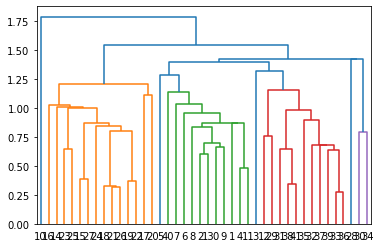

In [7]:
#层次分析可视化，leaf的字体不旋转，大小为10。
#这里我们不显示每一条数据的具体名字标签（varieties），默认以数字标签显示
dendrogram(mergings,leaf_rotation=0,leaf_font_size=10)
plt.show()
#在图中显示的数字是最细粒度的叶子，相当于每个样本数据点。

In [8]:
mergings

array([[33.        , 36.        ,  0.27162909,  2.        ],
       [21.        , 26.        ,  0.31365739,  2.        ],
       [18.        , 43.        ,  0.32280434,  3.        ],
       [38.        , 41.        ,  0.34657328,  2.        ],
       [19.        , 22.        ,  0.37233454,  2.        ],
       [15.        , 27.        ,  0.38916958,  2.        ],
       [ 4.        , 11.        ,  0.48519909,  2.        ],
       [ 2.        , 13.        ,  0.60220511,  2.        ],
       [39.        , 42.        ,  0.63766292,  3.        ],
       [23.        , 25.        ,  0.64447995,  2.        ],
       [31.        , 45.        ,  0.64461453,  3.        ],
       [ 0.        ,  9.        ,  0.66671658,  2.        ],
       [37.        , 50.        ,  0.68278398,  4.        ],
       [32.        , 54.        ,  0.68359363,  5.        ],
       [49.        , 53.        ,  0.69466413,  4.        ],
       [12.        , 29.        ,  0.76129577,  2.        ],
       [30.        , 34.

层次分析图从上到下看，依次是枝和叶。

第一列和第二列代表类标签，包含叶子和枝子。

第三列代表叶叶（或叶枝，枝枝）之间的距离

第四列代表该层次类中含有的样本数（记录数）

```
X = linkage(y, method='single', metric='euclidean') 
```

method是指计算类间距离的方法,比较常用的有3种: 

(1)single:最近邻,把类与类间距离最近的作为类间距 

(2)average:平均距离,类与类间所有pairs距离的平均

(3)complete:最远邻,把类与类间距离最远的作为类间距 

我们写曾侧分析法函数，看看不同的method从图中有什么区别

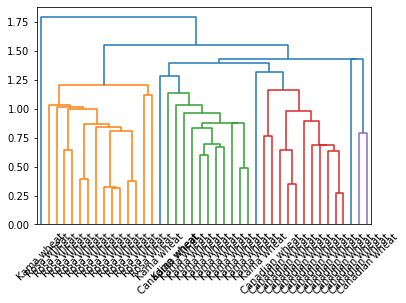

In [10]:
def hierarchy_analysis(samples,method='single'):
    mergings = linkage(samples, method=method)

    dendrogram(mergings,
              labels=varieties,
              leaf_rotation=45,
              leaf_font_size=10)
    plt.show()
    
    
#single
hierarchy_analysis(samples,method='single')

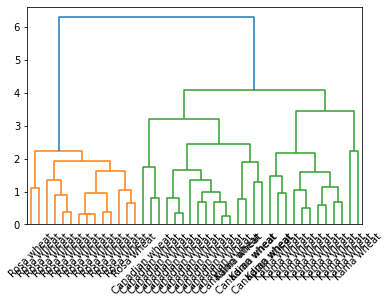

In [11]:
#average
hierarchy_analysis(samples,method='average')

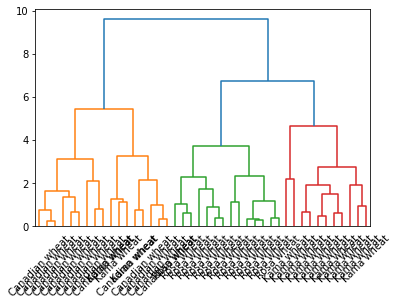

In [12]:
#complete
hierarchy_analysis(samples,method='complete')

由于数据量比较少，complete和average方法做出来的图完全一样。